<a href="https://colab.research.google.com/github/shank02/traffic_sign_classifier/blob/main/tsign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"shank02","key":"bc703d3f05db8cabf156be302020e556"}'}

In [ ]:
#installing kaggle api client
!pip install -q kaggle

In [ ]:
#setting up kaggle using its api
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#creating dir n changing current working dir
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

mkdir: cannot create directory ‘traffic_sign_dataset’: File exists
/content/traffic_sign_dataset


In [ ]:
#searching kaggle for datasets
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          62109        860  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           8458        229  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            299          8  0.75             
bhavinmoriya/german-traffic-sign-recognition-bench

In [ ]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

100% 610M/612M [00:07<00:00, 97.0MB/s]
100% 612M/612M [00:07<00:00, 90.0MB/s]
/content


In [ ]:
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Archive:  traffic_sign_dataset/gtsrb-german-traffic-sign.zip
  inflating: traffic_sign_dataset/Meta.csv  
  inflating: traffic_sign_dataset/Meta/.~lock.ClassesInformation.ods#  
  inflating: traffic_sign_dataset/Meta/.~lock.ClassesInformationStrong.ods#  
  inflating: traffic_sign_dataset/Meta/0.png  
  inflating: traffic_sign_dataset/Meta/1.png  
  inflating: traffic_sign_dataset/Meta/10.png  
  inflating: traffic_sign_dataset/Meta/11.png  
  inflating: traffic_sign_dataset/Meta/12.png  
  inflating: traffic_sign_dataset/Meta/13.png  
  inflating: traffic_sign_dataset/Meta/14.png  
  inflating: traffic_sign_dataset/Meta/15.png  
  inflating: traffic_sign_dataset/Meta/16.png  
  inflating: traffic_sign_dataset/Meta/17.png  
  inflating: traffic_sign_dataset/Meta/18.png  
  inflating: traffic_sign_dataset/Meta/19.png  
  inflating: traffic_sign_dataset/Meta/2.png  
  inflating: traffic_sign_dataset/Meta/20.png  
  inflating: traffic_sign_dataset/Meta/21.png  
  inflating: traffic_sign_d

In [ ]:
# Importing libraries
import os
import tensorflow as tf
import pandas as pd #for dataframe
import numpy as np #for math computations
import matplotlib.pyplot as plt #for visualization
from matplotlib.image import imread
import seaborn as sns #for visualization
import random
from PIL import Image
from sklearn.model_selection import  train_test_split #for splitting data
from tensorflow.keras.utils import to_categorical #for one hot encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

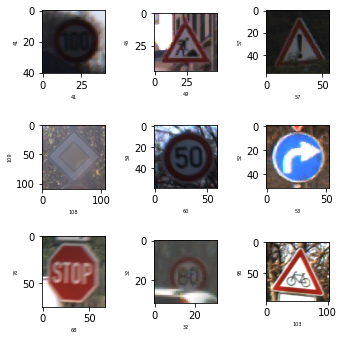

In [ ]:
plt.figure(figsize=(5,5))
path="traffic_sign_dataset/Test"
for i in range (1,10):
  plt.subplot(3,3,i)  #Adds an Axes to the current figure
  plt.tight_layout(pad=1.5)#Adjust the padding between and around subplots.
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=5)
  plt.ylabel(rand_img.shape[0],fontsize=5)


In [ ]:
#as seen above, the size of the images are varying so we'll make all of them equal
dim1=[] #dimension 1
dim2=[]
for i in range(0,43):
  labels='traffic_sign_dataset/Train'+ '/{0}'.format(i)
  image_path=os.listdir(labels)
  for x in image_path:
    img=imread(labels+'/'+x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])
  


In [ ]:
print("dimension1 mean:" , np.mean(dim1)," dimension2 mean:", np.mean(dim2))

dimension1 mean: 50.328929582493814  dimension2 mean: 50.83587951745773


In [ ]:
#resizing all the imgs to 50x50; usally theres no need to go for mean, a standard 50x50 size can be considered for most datasets
images=[]
label_id=[]
for i in range (43):
  labels='traffic_sign_dataset/Train'+ '/{0}'.format(i)
  image_path=os.listdir(labels)
  for x in image_path:
    img=Image.open(labels+'/'+x)
    img=img.resize((50,50))
    img=np.array(img)
    images.append(img)
    label_id.append(i)




In [ ]:
#converting images to a numpy array and normalizing the image(dividing by 255[cuz px value of each image ranges from 0 to 255])
images=np.array(images)
images=images/255


In [ ]:
#converting label ids into numpy array
label_id=np.array(label_id)
label_id.shape

(39209,)

In [ ]:
images.shape
#39209 imgs in 50x50 in r

(39209, 50, 50, 3)

In [ ]:
#finding out if the data is balanced or not by visualizing no. of classes
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [ ]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [ ]:
#one hot encoding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))#
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))#softmax for multi class classif

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

In [ ]:
#fitting data
model.fit(x_train, y_train, epochs = 10, batch_size= 128, validation_data = (x_val, y_val), verbose = 2)
#verbose is to print the output of how machine is learning from each epoch

Epoch 1/10
246/246 - 208s - loss: 0.3709 - accuracy: 0.8780 - val_loss: 0.1001 - val_accuracy: 0.9818 - 208s/epoch - 847ms/step
Epoch 2/10
246/246 - 208s - loss: 0.3429 - accuracy: 0.8853 - val_loss: 0.0850 - val_accuracy: 0.9857 - 208s/epoch - 848ms/step
Epoch 3/10
246/246 - 208s - loss: 0.3224 - accuracy: 0.8902 - val_loss: 0.0718 - val_accuracy: 0.9856 - 208s/epoch - 845ms/step
Epoch 4/10
246/246 - 206s - loss: 0.3081 - accuracy: 0.8975 - val_loss: 0.0734 - val_accuracy: 0.9869 - 206s/epoch - 837ms/step
Epoch 5/10
246/246 - 207s - loss: 0.2920 - accuracy: 0.9033 - val_loss: 0.0616 - val_accuracy: 0.9878 - 207s/epoch - 842ms/step
Epoch 6/10
246/246 - 206s - loss: 0.2736 - accuracy: 0.9083 - val_loss: 0.0549 - val_accuracy: 0.9895 - 206s/epoch - 837ms/step
Epoch 7/10
246/246 - 205s - loss: 0.2589 - accuracy: 0.9140 - val_loss: 0.0512 - val_accuracy: 0.9893 - 205s/epoch - 833ms/step
Epoch 8/10
246/246 - 208s - loss: 0.2462 - accuracy: 0.9161 - val_loss: 0.0491 - val_accuracy: 0.9903 - 

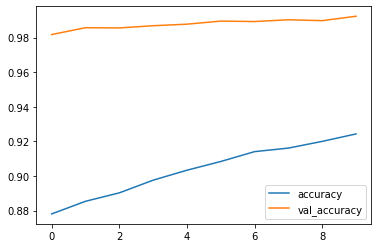

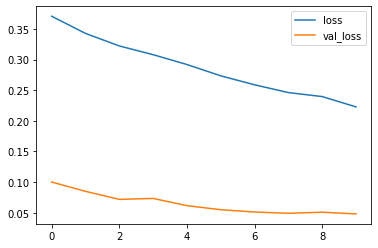

In [ ]:
evaluation = pd.DataFrame(model.history.history) #model history and taken in a dataframe
evaluation[['accuracy', 'val_accuracy']].plot()  #plot() is predefined in pandas
evaluation[['loss', 'val_loss']].plot()